In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from IPython.display import display
import joblib

import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


In [2]:
# Assuming you have a pandas DataFrame named `df` with the player game stats.
df = pd.read_csv('../../data/player_game_statistics.csv')
display(df.head())

,player_id,username,age,country,gender,game_name,game_id,total_games_played,total_wins,total_losses,win_ratio,total_moves,highest_score,rating,churned,player_level,last_played
0,c89803ee-b419-11ef-9d4e-00155d326b4e,Player00489,75,Singapore,FEMALE,Battleship,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,13,1,0,88.89,803,78,3,NO,Expert,2024-11-19 23:16:03
1,c80723d0-b419-11ef-9d4e-00155d326b4e,Champion00315,44,Norway,OTHER,Battleship,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,10,1,0,37.50,598,77,2,YES,Intermediate,2024-09-11 23:09:17
2,c7bf25d9-b419-11ef-9d4e-00155d326b4e,User00229,40,Germany,NON-BINARY,Battleship,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,11,0,1,20.00,542,68,1,NO,Intermediate,2024-11-21 23:26:43
3,c83fc36b-b419-11ef-9d4e-00155d326b4e,Champion00382,64,Netherlands,NON-BINARY,Battleship,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,8,0,1,37.50,453,79,2,NO,Intermediate,2024-02-18 23:23:48
4,c73e4798-b419-11ef-9d4e-00155d326b4e,Champion00079,30,South Africa,FEMALE,Battleship,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,10,1,0,100.00,561,79,3,YES,Intermediate,2024-11-30 23:25:26


In [3]:
# Preprocessing
df = df.dropna()  # Drop missing values 

# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
# df['country'] = le.fit_transform(df['country'])
df['game_name'] = le.fit_transform(df['game_name'])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['country', 'game_name'], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['player_id', 'game_id', 'username', 'churned', 'last_played','player_level'])
y = le.fit_transform(df['churned'])

In [4]:
# Save one-hot encoded column names
encoded_columns = list(df.columns)
np.save('encoded_columns.npy', encoded_columns)

In [5]:
display(df.head())
print(X.info())

,player_id,username,age,gender,game_id,total_games_played,total_wins,total_losses,win_ratio,total_moves,...,country_UK,country_USA,country_Vietnam,game_name_1,game_name_2,game_name_3,game_name_4,game_name_5,game_name_6,game_name_7
0,c89803ee-b419-11ef-9d4e-00155d326b4e,Player00489,75,0,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,13,1,0,88.89,803,...,False,False,False,False,False,False,False,False,False,False
1,c80723d0-b419-11ef-9d4e-00155d326b4e,Champion00315,44,3,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,10,1,0,37.50,598,...,False,False,False,False,False,False,False,False,False,False
2,c7bf25d9-b419-11ef-9d4e-00155d326b4e,User00229,40,2,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,11,0,1,20.00,542,...,False,False,False,False,False,False,False,False,False,False
3,c83fc36b-b419-11ef-9d4e-00155d326b4e,Champion00382,64,2,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,8,0,1,37.50,453,...,False,False,False,False,False,False,False,False,False,False
4,c73e4798-b419-11ef-9d4e-00155d326b4e,Champion00079,30,0,d035d6ce-b3e5-11ef-9d4e-00155d326b4e,10,1,0,100.00,561,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 0 to 2568
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2565 non-null   int64  
 1   gender                2565 non-null   int32  
 2   total_games_played    2565 non-null   int64  
 3   total_wins            2565 non-null   int64  
 4   total_losses          2565 non-null   int64  
 5   win_ratio             2565 non-null   float64
 6   total_moves           2565 non-null   int64  
 7   highest_score         2565 non-null   int64  
 8   rating                2565 non-null   int64  
 9   country_Brazil        2565 non-null   bool   
 10  country_Canada        2565 non-null   bool   
 11  country_China         2565 non-null   bool   
 12  country_Denmark       2565 non-null   bool   
 13  country_Finland       2565 non-null   bool   
 14  country_France        2565 non-null   bool   
 15  country_Germany       2565

In [6]:
print(X.columns)
display(X.head())

Index(['age', 'gender', 'total_games_played', 'total_wins', 'total_losses',
       'win_ratio', 'total_moves', 'highest_score', 'rating', 'country_Brazil',
       'country_Canada', 'country_China', 'country_Denmark', 'country_Finland',
       'country_France', 'country_Germany', 'country_India',
       'country_Indonesia', 'country_Ireland', 'country_Italy',
       'country_Japan', 'country_Malaysia', 'country_Mexico',
       'country_Netherlands', 'country_New Zealand', 'country_Nigeria',
       'country_Norway', 'country_Philippines', 'country_Russia',
       'country_Singapore', 'country_South Africa', 'country_South Korea',
       'country_Spain', 'country_Sweden', 'country_Thailand', 'country_UK',
       'country_USA', 'country_Vietnam', 'game_name_1', 'game_name_2',
       'game_name_3', 'game_name_4', 'game_name_5', 'game_name_6',
       'game_name_7'],
      dtype='object')


,age,gender,total_games_played,total_wins,total_losses,win_ratio,total_moves,highest_score,rating,country_Brazil,...,country_UK,country_USA,country_Vietnam,game_name_1,game_name_2,game_name_3,game_name_4,game_name_5,game_name_6,game_name_7
0,75,0,13,1,0,88.89,803,78,3,False,...,False,False,False,False,False,False,False,False,False,False
1,44,3,10,1,0,37.50,598,77,2,False,...,False,False,False,False,False,False,False,False,False,False
2,40,2,11,0,1,20.00,542,68,1,False,...,False,False,False,False,False,False,False,False,False,False
3,64,2,8,0,1,37.50,453,79,2,False,...,False,False,False,False,False,False,False,False,False,False
4,30,0,10,1,0,100.00,561,79,3,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
display(X_train)

,age,gender,total_games_played,total_wins,total_losses,win_ratio,total_moves,highest_score,rating,country_Brazil,...,country_UK,country_USA,country_Vietnam,game_name_1,game_name_2,game_name_3,game_name_4,game_name_5,game_name_6,game_name_7
1137,45,0,6,0,1,40.00,185,39,2,False,...,False,False,False,False,False,True,False,False,False,False
1301,28,1,6,0,1,20.00,145,37,1,False,...,False,False,False,False,False,True,False,False,False,False
1935,32,1,5,1,0,66.67,130,36,2,False,...,False,False,False,False,False,False,False,False,False,True
1352,27,3,6,1,0,66.67,177,38,2,False,...,False,False,False,False,False,True,False,False,False,False
1771,67,2,6,1,0,75.00,173,38,2,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,65,0,8,1,0,50.00,222,39,2,False,...,True,False,False,False,False,False,False,False,True,False
1097,60,3,6,1,0,80.00,179,37,2,False,...,False,False,False,False,False,True,False,False,False,False
1132,32,3,4,1,0,50.00,134,39,1,False,...,False,False,False,False,False,True,False,False,False,False
1296,78,3,10,0,1,44.44,257,37,3,False,...,False,False,False,False,False,True,False,False,False,False


In [9]:
# Scale features for models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
display(X_train_scaled)

array([[-0.04781117, -1.34887866, -0.64591117, ..., -0.37416574,
        -0.35268054, -0.35442505],
       [-0.91332478, -0.46087769, -0.64591117, ..., -0.37416574,
        -0.35268054, -0.35442505],
       [-0.70967452, -0.46087769, -1.01644785, ..., -0.37416574,
        -0.35268054,  2.82147102],
       ...,
       [-0.70967452,  1.31512424, -1.38698453, ..., -0.37416574,
        -0.35268054, -0.35442505],
       [ 1.63230349,  1.31512424,  0.83623556, ..., -0.37416574,
        -0.35268054, -0.35442505],
       [ 0.46131449, -0.46087769,  2.3183823 , ..., -0.37416574,
        -0.35268054, -0.35442505]])

In [11]:
display(X_test_scaled)

array([[-0.20054886, -1.34887866, -0.64591117, ..., -0.37416574,
        -0.35268054, -0.35442505],
       [ 0.97044014, -1.34887866, -0.64591117, ..., -0.37416574,
        -0.35268054, -0.35442505],
       [-0.04781117, -1.34887866, -1.01644785, ...,  2.67261242,
        -0.35268054, -0.35442505],
       ...,
       [-0.45511169, -0.46087769, -1.75752122, ...,  2.67261242,
        -0.35268054, -0.35442505],
       [-1.3206253 ,  0.42712327,  0.0951622 , ..., -0.37416574,
         2.83542723, -0.35442505],
       [ 1.07226527, -1.34887866, -0.27537448, ..., -0.37416574,
        -0.35268054, -0.35442505]])

In [12]:
# Initialize models with default parameters
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

#### Hyperparameter Tuning with GridSearchCV

In [13]:
# Hyperparameter Tuning with GridSearchCV
print("Performing Hyperparameter Tuning...")

Performing Hyperparameter Tuning...


In [14]:
# Logistic Regression
log_reg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train_scaled, y_train)
log_reg = log_reg_grid.best_estimator_

In [15]:
# Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_clf = rf_grid.best_estimator_

In [16]:
# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_clf, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
svm_clf = svm_grid.best_estimator_

In [17]:
# XGBoost
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_clf = xgb_grid.best_estimator_

In [18]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('xgb', xgb_clf),
        ('rf', rf_clf),
        ('svm', svm_clf)
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=Non...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, probability=True, random_state=42))],
                 voting='soft')

#### Cross-Validation

In [19]:
# Cross-Validation Scores
print("Cross-Validation Scores:")
cv_scores = {
    'Logistic Regression': cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
    'Random Forest': cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy').mean(),
    'SVM': cross_val_score(svm_clf, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
    'XGBoost': cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy').mean(),
    'Voting Classifier': cross_val_score(voting_clf, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
}


Cross-Validation Scores:


In [20]:
# Predictions
log_reg_pred = log_reg.predict(X_test_scaled)
xgb_pred = xgb_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test_scaled)
voting_pred = voting_clf.predict(X_test_scaled)

In [21]:
# # Feature Importance
# rf_importances = rf_clf.feature_importances_
# xgb_importances = xgb_clf.feature_importances_

In [22]:
# Collecting all models' results
models = ['Logistic Regression', 'XGBoost', 'SVM', 'Random Forest', 'Voting Classifier']
accuracies = [
    accuracy_score(y_test, log_reg_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, voting_pred)
]

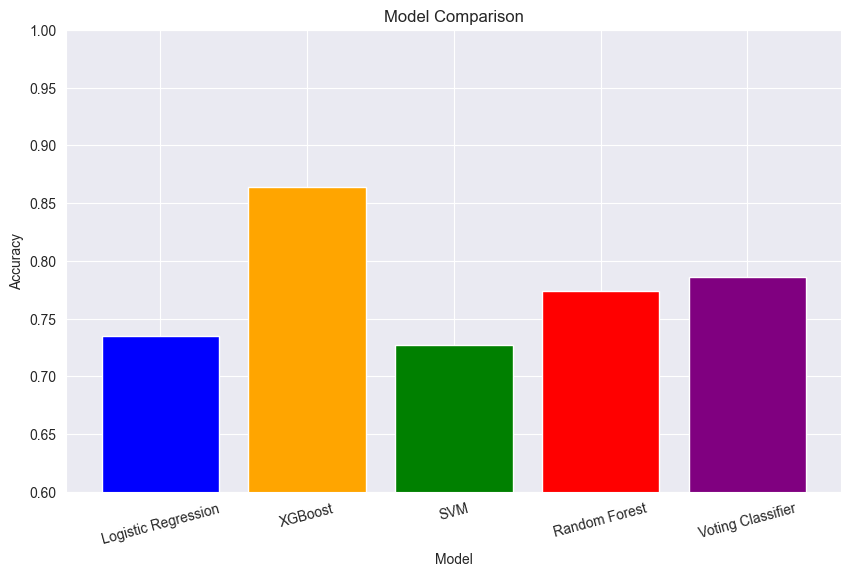

In [23]:
# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.6, 1.0)  # Adjust as necessary
plt.xticks(rotation=15)
plt.show()

In [24]:
# Additional Evaluation using classification reports
print("Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("Voting Classifier Report:\n", classification_report(y_test, voting_pred))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.59      0.28      0.38       149
           1       0.76      0.92      0.83       364

    accuracy                           0.73       513
   macro avg       0.68      0.60      0.60       513
weighted avg       0.71      0.73      0.70       513

XGBoost Report:
               precision    recall  f1-score   support

           0       0.93      0.57      0.71       149
           1       0.85      0.98      0.91       364

    accuracy                           0.86       513
   macro avg       0.89      0.78      0.81       513
weighted avg       0.87      0.86      0.85       513

SVM Report:
               precision    recall  f1-score   support

           0       0.58      0.21      0.31       149
           1       0.74      0.94      0.83       364

    accuracy                           0.73       513
   macro avg       0.66      0.57      0.57       513
weighted avg   

In [25]:
# Display Cross-Validation Scores
print("\nCross-Validation Scores:")
for model, score in cv_scores.items():
    print(f"{model}: {score:.4f}")


Cross-Validation Scores:
Logistic Regression: 0.7359
Random Forest: 0.7802
SVM: 0.7485
XGBoost: 0.8416
Voting Classifier: 0.7866


In [26]:
# After training
joblib.dump(xgb_clf, 'xgb_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']